___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [178]:
!pip install transformers

In [179]:
import warnings
from subprocess import check_output

warnings.filterwarnings('ignore')

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
from pprint import pprint

In [181]:
!pip install nltk

In [182]:
!pip install wordcloud

In [183]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [184]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/marammahal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marammahal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/marammahal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/marammahal/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [185]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, \
f1_score, recall_score,ConfusionMatrixDisplay
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import average_precision_score
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.utils.class_weight import compute_class_weight

In [186]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l1
from transformers import AutoTokenizer
from transformers import TFAutoModel ,TFBertModel
from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
from tensorflow.keras import Model
import os

### Data Wrangling

In [187]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [189]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,23486.0,11742.500000,6779.968547,0.0,5871.25,11742.5,17613.75,23485.0
Clothing ID,23486.0,918.118709,203.298980,0.0,861.00,936.0,1078.00,1205.0
Age,23486.0,43.198544,12.279544,18.0,34.00,41.0,52.00,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.00,5.0,5.00,5.0
Recommended IND,23486.0,0.822362,0.382216,0.0,1.00,1.0,1.00,1.0
Positive Feedback Count,23486.0,2.535936,5.702202,0.0,0.00,1.0,3.00,122.0


In [190]:
df.shape

(23486, 11)

In [191]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [192]:
df.duplicated().sum()

0

In [193]:
df.nunique()

Unnamed: 0                 23486
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [194]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [195]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [196]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [197]:
df['Recommended IND'].value_counts()

Recommended IND
1    19314
0     4172
Name: count, dtype: int64

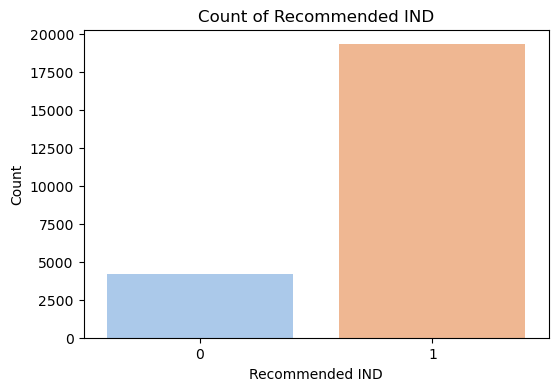

In [198]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Recommended IND", palette="pastel")
plt.title("Count of Recommended IND")
plt.xlabel("Recommended IND")
plt.ylabel("Count")

plt.show()


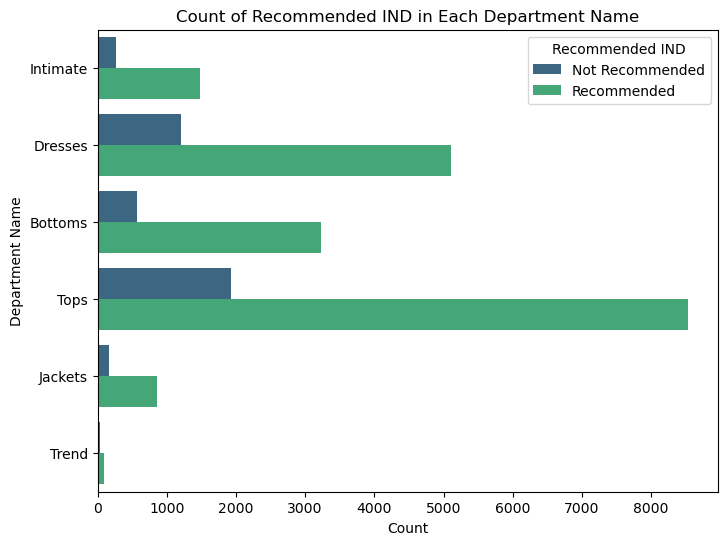

In [199]:

plt.figure(figsize=(8, 6))
sns.countplot(data=df, y="Department Name", hue="Recommended IND", palette="viridis", orient="h")
plt.title("Count of Recommended IND in Each Department Name")
plt.xlabel("Count")
plt.ylabel("Department Name")
plt.legend(title="Recommended IND", labels=["Not Recommended", "Recommended"])

plt.show()


## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [200]:
dfc = df.copy()

In [201]:
# drop rows with no reviews
dfc = dfc.dropna(axis=0,  how = 'all', subset=['Review Text'])

In [202]:
# renaming the columns to more suitable ones
dfc.rename(columns = {'Review Text':'Review', 'Recommended IND':'Recommended'},  inplace = True)

In [203]:
dfc.columns

Index(['Clothing ID', 'Age', 'Title', 'Review', 'Rating', 'Recommended',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [204]:
dfc['Recommended']

0        1
1        1
2        0
3        1
4        1
        ..
23481    1
23482    1
23483    0
23484    1
23485    1
Name: Recommended, Length: 22641, dtype: int64

In [205]:
dfc['Review'] = dfc['Review'].str.replace('$', '')


---
---


### Missing Value Detection

In [207]:
dff.head()

,Review,Recommended
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [208]:
dff = dff.dropna(axis=0,  how = 'all', subset=['Review'])

In [223]:
dff.isnull().value_counts()

Review  Recommended
False   False          22641
Name: count, dtype: int64

In [210]:
dff.dropna(inplace = True) 
dff.reset_index(drop=True,inplace=True)
dff


,Review,Recommended
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
22636,I was very happy to snag this dress at such a ...,1
22637,"It reminds me of maternity clothes. soft, stre...",1
22638,"This fit well, but the top was very see throug...",0
22639,I bought this dress for a wedding i have this ...,1


In [211]:
dff.isnull().count()

Review         22641
Recommended    22641
dtype: int64

In [230]:
def missing_values(dff):
    missing_number = dff.isnull().sum().sort_values(ascending=False)
    missing_percent = (dff.isnull().sum()/dff.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]
missing_values(dff)

,Missing_Number,Missing_Percent


In [237]:
dff.isnull().sum()

Review         0
Recommended    0
dtype: int64

In [233]:
dff["Review"].str.isspace().sum()

0

In [235]:
dff[dff["Review"].str.isspace() == True].index

Index([], dtype='int64')

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [238]:
stop_words = stopwords.words("english")
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [239]:
for i in ['not', 'no',  'ain', 'aren', "aren't", 'couldn', "couldn't",
          'didn', "didn't", 'doesn', "doesn't", 'hadn',"hadn't", 'hasn',
          "hasn't", 'haven', "haven't",'isn', "isn't", 'ma', 'mightn',
          "mightn't", 'mustn',"mustn't", 'needn', "needn't", 'shan',
          "shan't", 'shouldn',"shouldn't", 'wasn', "wasn't", 'weren',
          "weren't", 'won',"won't", 'wouldn', "wouldn't"]:
    stop_words.remove(i)

In [244]:
def cleaning(data):

    #1. Remove Puncs
    text = re.sub('[^\w\s]','', data)

    #2. Tokenize and lower
    text_tokens = word_tokenize(data.replace("'", "").lower())

    #3. Remove Punctuation and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #5. Normalization-Lemmatization
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #joining
    return " ".join(text_cleaned)

In [245]:
dff["Review"] = dff["Review"].apply(cleaning)
dff["Review"].head()
#Review after cleaning

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Review, dtype: object

In [246]:
#Review befor cleaning
dfc["Review"].head()

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
2    I had such high hopes for this dress and reall...
3    I love, love, love this jumpsuit. it's fun, fl...
4    This shirt is very flattering to all due to th...
Name: Review, dtype: object

In [251]:
dff.duplicated().value_counts()

False    22631
True        10
Name: count, dtype: int64

In [254]:
dff=dff.drop_duplicates()
# we remove the duplicated rows
dff.reset_index(drop=True, inplace=True)

In [255]:
dff.duplicated().value_counts()

False    22631
Name: count, dtype: int64

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [257]:
pos = dff[dff["Recommended"] == 1]["Review"]
neg = dff[dff["Recommended"] == 0]["Review"]

In [258]:
pos

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
22625    wasnt sure ordering skirt couldnt see person f...
22626    happy snag dress great price easy slip flatter...
22627    reminds maternity clothes soft stretchy shiny ...
22629    bought dress wedding summer cute unfortunately...
22630    dress lovely platinum feminine fit perfectly e...
Name: Review, Length: 18531, dtype: object

In [261]:
pos.info()

<class 'pandas.core.series.Series'>
Index: 18531 entries, 0 to 22630
Series name: Review
Non-Null Count  Dtype 
--------------  ----- 
18531 non-null  object
dtypes: object(1)
memory usage: 289.5+ KB


In [262]:
neg

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
22       first not pullover styling side zipper wouldnt...
25       loved material didnt really look long dress pu...
                               ...                        
22596    tried color really pretty fun donset want pair...
22597    wanted love jacket soft great color unfortunat...
22607    purchased good price typically love maeve fabr...
22624    surprised positive review product terrible cut...
22628    fit well top see never would worked im glad ab...
Name: Review, Length: 4100, dtype: object

In [260]:
neg.info()

<class 'pandas.core.series.Series'>
Index: 4100 entries, 2 to 22628
Series name: Review
Non-Null Count  Dtype 
--------------  ----- 
4100 non-null   object
dtypes: object(1)
memory usage: 64.1+ KB


### Collect Words (positive and negative separately)

In [266]:
pos_coll = ' '.join(pos)

In [268]:
pos_coll [:500]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh '

In [269]:
neg_coll = ' '.join(neg)

In [270]:
neg_coll[:500]

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would ta'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

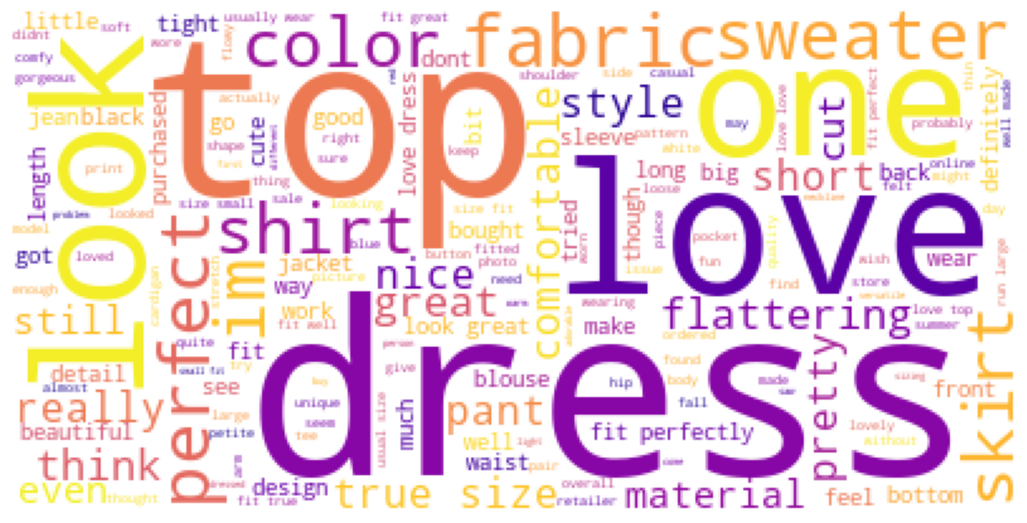

In [281]:
wordcloud_pos = WordCloud(background_color="white", max_words =300, colormap='plasma').generate(pos_coll)

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud_pos)
plt.axis("off")
plt.show()

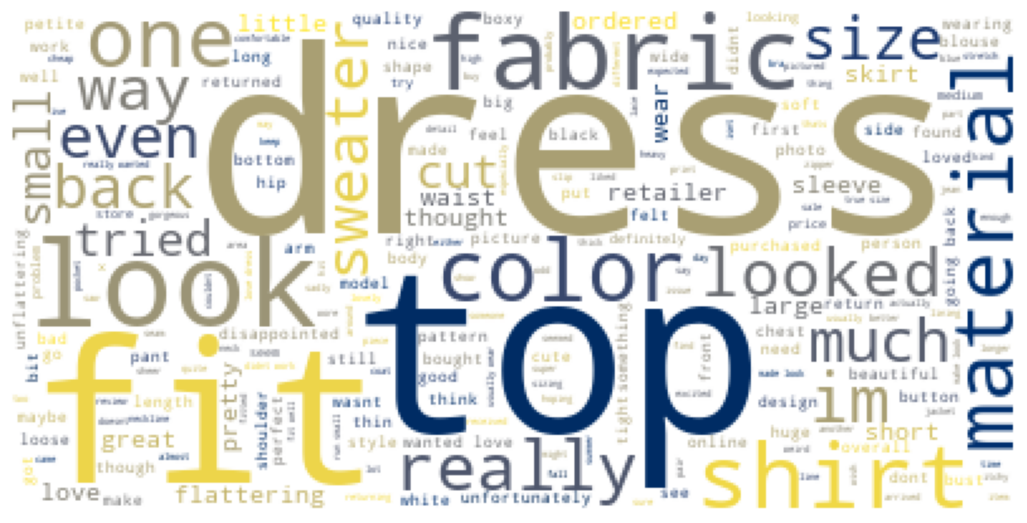

In [280]:
wordcloud_neg = WordCloud(background_color="white", max_words =300, colormap='cividis').generate(neg_coll)

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud_neg)
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [282]:
X = dff["Review"].values
y = dff["Recommended"].values

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state= 350)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [285]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)
X_train_countVec = vectorizer.fit_transform(X_train)
X_test_countVec = vectorizer.transform(X_test)

In [286]:
df_trn_cnt = pd.DataFrame(X_train_countVec.toarray(), columns = vectorizer.get_feature_names_out())
df_tst_cnt = pd.DataFrame(X_test_countVec.toarray(), columns = vectorizer.get_feature_names_out())

In [288]:
df_trn_cnt[:6]

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,...,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [289]:
df_tst_cnt[:6]

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,...,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [290]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [294]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())[:6]

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,...,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.136074,0.0,0.213887,0.0,0.0


In [295]:
pd.DataFrame(X_test_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())[:6]

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,...,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.165756,0.0,0.144471,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


### Eval Function

In [302]:

def eval_metric(model, X_train, y_train, X_test, y_test, dl=False):
    if dl:
        y_train_pred = (model.predict(X_train) > 0.5).astype(int)
        y_pred = (model.predict(X_test) > 0.5).astype(int)
    else:
        y_train_pred = model.predict(X_train)
        y_pred = model.predict(X_test)

    print("Test Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    print("Train Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

def roc_auc_plot(model, y_train, X_train, y_test, X_test):
    pred_train = model.predict(X_train).ravel()
    pred_test = model.predict(X_test).ravel()

    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, pred_train)
    fpr_keras_test, tpr_keras_test, thresholds_keras_test = roc_curve(y_test, pred_test)

    auc_keras = auc(fpr_keras, tpr_keras)
    auc_keras_test = auc(fpr_keras_test, tpr_keras_test)

    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label=f'Train (area = {auc_keras:.3f})')
    plt.plot(fpr_keras_test, tpr_keras_test, label=f'Test (area = {auc_keras_test:.3f})')

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

def eval_scores(model, X_train, y_train):
    scoring = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1'
    }

    scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True, n_jobs=-1)
    df_scores = pd.DataFrame(scores, index=range(1, 6))
    return df_scores

def eval_scores_dl(y_true, y_pred):
    precision_s = average_precision_score(y_true, y_pred)
    recall_s = recall_score(y_true, y_pred, average='weighted', labels=np.unique(y_pred))
    f1_s = f1_score(y_true, y_pred, average='weighted', labels=np.unique(y_pred))
    models_scores = pd.DataFrame({'f-1': [f1_s], 'precision': [precision_s], 'recall': [recall_s]})
    return models_scores


## Logistic Regression

### CountVectorizer

In [303]:
log_Reg = LogisticRegression(max_iter=5000, class_weight= "balanced", random_state=350)
log_Reg.fit(X_train_countVec,y_train)

LogisticRegression(class_weight='balanced', max_iter=5000, random_state=350)

In [304]:
eval(log_Reg, X_train_countVec, X_test_countVec,y_train, y_test)

In [306]:
log_scores = eval_scores(log_Reg, X_train_countVec, y_train)


In [307]:
log_scores 

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,1.090599,0.022441,0.866888,0.938134,0.944504,0.993784,0.889713,0.930264,0.916290,0.960976
2,1.056855,0.028264,0.866335,0.936546,0.947672,0.992615,0.885666,0.929421,0.915621,0.959979
3,1.102121,0.024719,0.869097,0.935580,0.945299,0.993229,0.891737,0.927650,0.917737,0.959320
4,1.066256,0.025675,0.859155,0.937237,0.949469,0.992888,0.874536,0.930011,0.910463,0.960421
5,0.629157,0.013418,0.867680,0.935860,0.945181,0.993321,0.890013,0.927909,0.916768,0.959501


In [310]:
eval_metric(log_Reg, X_train_countVec, y_train, X_test_countVec, y_test)

Test Set
[[ 654  166]
 [ 408 3299]]
              precision    recall  f1-score   support

           0       0.62      0.80      0.70       820
           1       0.95      0.89      0.92      3707

    accuracy                           0.87      4527
   macro avg       0.78      0.84      0.81      4527
weighted avg       0.89      0.87      0.88      4527

Train Set
[[ 3171   109]
 [ 1145 13679]]
              precision    recall  f1-score   support

           0       0.73      0.97      0.83      3280
           1       0.99      0.92      0.96     14824

    accuracy                           0.93     18104
   macro avg       0.86      0.94      0.90     18104
weighted avg       0.95      0.93      0.93     18104



### TF-IDF

In [311]:
log_Reg_TF_IDF = LogisticRegression(max_iter=5000, class_weight= "balanced", random_state=350)
log_Reg_TF_IDF.fit(X_train_tf_idf,y_train)

LogisticRegression(class_weight='balanced', max_iter=5000, random_state=350)

In [312]:
eval(log_Reg_TF_IDF, X_train_tf_idf, X_test_tf_idf,y_train, y_test)

In [313]:
log_scores_TF_IDF = eval_scores(log_Reg_TF_IDF, X_train_tf_idf, y_train)
log_scores_TF_IDF

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.249309,0.027121,0.860260,0.895257,0.960659,0.984630,0.864755,0.885909,0.910188,0.932665
2,0.246348,0.021173,0.863021,0.896085,0.961151,0.984375,0.867791,0.887174,0.912088,0.933251
3,0.309481,0.048819,0.863574,0.893668,0.961180,0.985143,0.868465,0.883464,0.912473,0.931537
4,0.242752,0.029321,0.863297,0.893737,0.963241,0.982965,0.866105,0.885572,0.912094,0.931730
5,0.186387,0.012571,0.864365,0.893469,0.961553,0.983685,0.869096,0.884570,0.912990,0.931498


In [315]:
eval_metric(log_Reg_TF_IDF, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

Test Set
[[ 711  109]
 [ 469 3238]]
              precision    recall  f1-score   support

           0       0.60      0.87      0.71       820
           1       0.97      0.87      0.92      3707

    accuracy                           0.87      4527
   macro avg       0.78      0.87      0.81      4527
weighted avg       0.90      0.87      0.88      4527

Train Set
[[ 3059   221]
 [ 1733 13091]]
              precision    recall  f1-score   support

           0       0.64      0.93      0.76      3280
           1       0.98      0.88      0.93     14824

    accuracy                           0.89     18104
   macro avg       0.81      0.91      0.84     18104
weighted avg       0.92      0.89      0.90     18104



## Naive Bayes 

### Countvectorizer

In [319]:
nvbs = BernoulliNB()
nvbs.fit(X_train_countVec,y_train)

BernoulliNB()

In [320]:
eval(nvbs, X_train_countVec, X_test_countVec,y_train, y_test)

In [321]:
nvbs_scores = eval_scores(nvbs, X_train_countVec, y_train)
nvbs_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.038979,0.025206,0.870754,0.899883,0.934563,0.953156,0.905565,0.923096,0.919836,0.937886
2,0.030357,0.024006,0.871859,0.898847,0.936475,0.952937,0.904890,0.922000,0.920412,0.937213
3,0.033005,0.024897,0.869649,0.893392,0.931763,0.950240,0.907251,0.917868,0.919344,0.933774
4,0.033274,0.026411,0.884562,0.897259,0.943883,0.952053,0.913322,0.920904,0.928351,0.936219
5,0.024633,0.015276,0.875414,0.897473,0.936436,0.951519,0.909582,0.921754,0.922814,0.936400


In [322]:
eval_metric(nvbs, X_train_countVec, y_train, X_test_countVec, y_test)

Test Set
[[ 604  216]
 [ 330 3377]]
              precision    recall  f1-score   support

           0       0.65      0.74      0.69       820
           1       0.94      0.91      0.93      3707

    accuracy                           0.88      4527
   macro avg       0.79      0.82      0.81      4527
weighted avg       0.89      0.88      0.88      4527

Train Set
[[ 2614   666]
 [ 1236 13588]]
              precision    recall  f1-score   support

           0       0.68      0.80      0.73      3280
           1       0.95      0.92      0.93     14824

    accuracy                           0.89     18104
   macro avg       0.82      0.86      0.83     18104
weighted avg       0.90      0.89      0.90     18104



### TF-IDF

In [323]:
nvbs_tfidf = BernoulliNB()
nvbs_tfidf.fit(X_train_tf_idf,y_train)

BernoulliNB()

In [325]:
eval(nvbs_tfidf, X_train_tf_idf, X_test_tf_idf,y_train, y_test)

In [326]:
nvbs_scores_TF_IDF = eval_scores(nvbs_tfidf, X_train_tf_idf, y_train)
nvbs_scores_TF_IDF

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.027278,0.027071,0.870478,0.900642,0.933634,0.953043,0.906239,0.924193,0.919733,0.938396
2,0.030850,0.044655,0.870754,0.898847,0.935777,0.952621,0.904216,0.922337,0.919726,0.937235
3,0.037454,0.036577,0.869925,0.893876,0.931787,0.950270,0.907589,0.918459,0.919528,0.934094
4,0.034757,0.035624,0.884838,0.896845,0.943593,0.951555,0.913997,0.920904,0.928559,0.935979
5,0.029657,0.018766,0.876243,0.897887,0.936502,0.951387,0.910594,0.922428,0.923366,0.936684


In [327]:
eval_metric(nvbs_tfidf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

Test Set
[[ 603  217]
 [ 327 3380]]
              precision    recall  f1-score   support

           0       0.65      0.74      0.69       820
           1       0.94      0.91      0.93      3707

    accuracy                           0.88      4527
   macro avg       0.79      0.82      0.81      4527
weighted avg       0.89      0.88      0.88      4527

Train Set
[[ 2611   669]
 [ 1222 13602]]
              precision    recall  f1-score   support

           0       0.68      0.80      0.73      3280
           1       0.95      0.92      0.94     14824

    accuracy                           0.90     18104
   macro avg       0.82      0.86      0.83     18104
weighted avg       0.90      0.90      0.90     18104



## Support Vector Machine (SVM)

### Countvectorizer

In [328]:
svm = LinearSVC(class_weight='balanced', max_iter=5000, random_state=350) 
svm.fit(X_train_countVec,y_train)

LinearSVC(class_weight='balanced', max_iter=5000, random_state=350)

In [329]:
eval(svm, X_train_countVec, X_test_countVec,y_train, y_test)

In [330]:
svm_scores = eval_scores(svm, X_train_countVec, y_train)
svm_scores

/Users/marammahal/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/marammahal/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/marammahal/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/marammahal/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of 

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,7.042272,0.029102,0.847280,0.969343,0.924947,0.997906,0.885329,0.964584,0.904704,0.980962
2,7.280417,0.015987,0.858879,0.970586,0.931435,0.997303,0.893423,0.966692,0.912033,0.981759
3,6.646268,0.026396,0.853079,0.969758,0.926992,0.997647,0.890725,0.965343,0.908497,0.981229
4,7.130512,0.028033,0.847280,0.970655,0.926450,0.997910,0.883642,0.966186,0.904540,0.981792
5,2.554500,0.015669,0.854696,0.968724,0.927719,0.997644,0.892038,0.964081,0.909529,0.980575


In [331]:
eval_metric(svm, X_train_countVec, y_train, X_test_countVec, y_test)

Test Set
[[ 585  235]
 [ 417 3290]]
              precision    recall  f1-score   support

           0       0.58      0.71      0.64       820
           1       0.93      0.89      0.91      3707

    accuracy                           0.86      4527
   macro avg       0.76      0.80      0.78      4527
weighted avg       0.87      0.86      0.86      4527

Train Set
[[ 3225    55]
 [  678 14146]]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      3280
           1       1.00      0.95      0.97     14824

    accuracy                           0.96     18104
   macro avg       0.91      0.97      0.94     18104
weighted avg       0.97      0.96      0.96     18104



### TD-IDF

In [332]:
svm_tfidf = LinearSVC(class_weight='balanced', max_iter=5000, random_state=350) 
svm.fit(X_train_tf_idf,y_train)

LinearSVC(class_weight='balanced', max_iter=5000, random_state=350)

In [334]:
svm_scores_TF_IDF = eval_scores(svm_tfidf, X_train_tf_idf, y_train)
svm_scores_TF_IDF

/Users/marammahal/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/marammahal/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/marammahal/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/marammahal/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of 

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.500494,0.056077,0.861364,0.935994,0.947005,0.994661,0.879933,0.926807,0.912238,0.959536
2,0.560768,0.033025,0.865783,0.935994,0.950236,0.994571,0.882293,0.926891,0.915005,0.959539
3,0.576461,0.031427,0.865783,0.933094,0.948932,0.994730,0.883642,0.923181,0.915124,0.957621
4,0.564380,0.024221,0.859431,0.935303,0.950808,0.994477,0.873524,0.926132,0.910529,0.959088
5,0.239108,0.017846,0.869613,0.932753,0.949495,0.994279,0.887989,0.923187,0.917713,0.957415


In [337]:
eval(svm, X_train_tf_idf, X_test_tf_idf, y_train, y_test)

In [338]:
eval_metric(nvbs_tfidf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

Test Set
[[ 603  217]
 [ 327 3380]]
              precision    recall  f1-score   support

           0       0.65      0.74      0.69       820
           1       0.94      0.91      0.93      3707

    accuracy                           0.88      4527
   macro avg       0.79      0.82      0.81      4527
weighted avg       0.89      0.88      0.88      4527

Train Set
[[ 2611   669]
 [ 1222 13602]]
              precision    recall  f1-score   support

           0       0.68      0.80      0.73      3280
           1       0.95      0.92      0.94     14824

    accuracy                           0.90     18104
   macro avg       0.82      0.86      0.83     18104
weighted avg       0.90      0.90      0.90     18104



## Random Forest

### Countvectorizer

In [339]:
rf = RandomForestClassifier(class_weight= "balanced", random_state=350)
rf.fit(X_train_countVec, y_train)

RandomForestClassifier(class_weight='balanced', random_state=350)

In [340]:
eval(rf, X_train_countVec, X_test_countVec, y_train, y_test)

In [341]:
rf_scores = eval_scores(rf, X_train_countVec, y_train)
rf_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,27.237761,0.273477,0.855289,1.000000,0.857603,1.000000,0.987184,1.0,0.917843,1.000000
2,27.245448,0.276902,0.855565,1.000000,0.859118,1.000000,0.985160,1.0,0.917832,1.000000
3,26.900757,0.278699,0.861640,0.999931,0.862994,0.999916,0.987858,1.0,0.921214,0.999958
4,27.154294,0.276988,0.863850,1.000000,0.863316,1.000000,0.990556,1.0,0.922569,1.000000
5,19.671656,0.162658,0.858564,1.000000,0.859320,1.000000,0.989204,1.0,0.919699,1.000000


In [342]:
eval_metric(rf, X_train_countVec, y_train, X_test_countVec, y_test)

Test Set
[[ 262  558]
 [  53 3654]]
              precision    recall  f1-score   support

           0       0.83      0.32      0.46       820
           1       0.87      0.99      0.92      3707

    accuracy                           0.87      4527
   macro avg       0.85      0.65      0.69      4527
weighted avg       0.86      0.87      0.84      4527

Train Set
[[ 3280     0]
 [    0 14824]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3280
           1       1.00      1.00      1.00     14824

    accuracy                           1.00     18104
   macro avg       1.00      1.00      1.00     18104
weighted avg       1.00      1.00      1.00     18104



### TF-IDF

In [343]:
rf_tfidf = RandomForestClassifier(class_weight= "balanced", random_state=101)
rf_tfidf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [344]:
eval(rf_tfidf, X_train_tf_idf, X_test_tf_idf, y_train, y_test)

In [345]:
rf_scores_TF_IDF = eval_scores(rf_tfidf, X_train_tf_idf, y_train)
rf_scores_TF_IDF

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,26.531716,0.513166,0.858879,0.999931,0.860247,0.999916,0.988196,1.0,0.919793,0.999958
2,27.228020,0.418337,0.853632,0.999931,0.860527,0.999916,0.980101,1.0,0.916430,0.999958
3,26.688884,0.519248,0.861364,0.999931,0.862739,0.999916,0.987858,1.0,0.921069,0.999958
4,27.465649,0.467788,0.859983,1.000000,0.861258,1.000000,0.988196,1.0,0.920371,1.000000
5,23.859355,0.279243,0.864917,1.000000,0.864937,1.000000,0.989541,1.0,0.923053,1.000000


In [346]:
eval_metric(rf_tfidf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

Test Set
[[ 253  567]
 [  55 3652]]
              precision    recall  f1-score   support

           0       0.82      0.31      0.45       820
           1       0.87      0.99      0.92      3707

    accuracy                           0.86      4527
   macro avg       0.84      0.65      0.69      4527
weighted avg       0.86      0.86      0.84      4527

Train Set
[[ 3280     0]
 [    0 14824]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3280
           1       1.00      1.00      1.00     14824

    accuracy                           1.00     18104
   macro avg       1.00      1.00      1.00     18104
weighted avg       1.00      1.00      1.00     18104



## Ada Boosting

### Countvectorizer

In [347]:
ada_boos = AdaBoostClassifier( random_state=350)
ada_boos.fit(X_train_countVec, y_train)

AdaBoostClassifier(random_state=350)

In [348]:
eval(ada_boos, X_train_countVec, X_test_countVec,y_train, y_test)

In [349]:
ada_boos_scores = eval_scores(ada_boos, X_train_countVec, y_train)
ada_boos_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,4.972675,0.489322,0.856946,0.863012,0.882224,0.887346,0.952445,0.953790,0.915991,0.919369
2,4.998905,0.480779,0.856669,0.866878,0.881949,0.888871,0.952445,0.957079,0.915842,0.921715
3,4.937266,0.489593,0.858603,0.867431,0.882206,0.889979,0.954806,0.956320,0.917072,0.921958
4,4.942772,0.485625,0.858326,0.862598,0.883365,0.885839,0.952782,0.955308,0.916761,0.919263
5,2.310783,0.282279,0.865193,0.861917,0.891772,0.886606,0.950742,0.953288,0.920314,0.918739


In [350]:
eval_metric(ada_boos, X_train_countVec, y_train, X_test_countVec, y_test)

Test Set
[[ 384  436]
 [ 189 3518]]
              precision    recall  f1-score   support

           0       0.67      0.47      0.55       820
           1       0.89      0.95      0.92      3707

    accuracy                           0.86      4527
   macro avg       0.78      0.71      0.73      4527
weighted avg       0.85      0.86      0.85      4527

Train Set
[[ 1484  1796]
 [  673 14151]]
              precision    recall  f1-score   support

           0       0.69      0.45      0.55      3280
           1       0.89      0.95      0.92     14824

    accuracy                           0.86     18104
   macro avg       0.79      0.70      0.73     18104
weighted avg       0.85      0.86      0.85     18104



### TF-IDF

In [352]:
ada_tfidf = AdaBoostClassifier(random_state=350)
ada_tfidf.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(random_state=350)

In [353]:
ada_scores_TF_IDF = eval_scores(ada_tfidf, X_train_tf_idf, y_train)
ada_scores_TF_IDF

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,9.302990,0.613175,0.857222,0.865221,0.881784,0.889090,0.953457,0.954465,0.916221,0.920618
2,9.296105,0.611691,0.856946,0.869157,0.882703,0.892160,0.951771,0.955730,0.915936,0.922851
3,9.154719,0.624402,0.861364,0.869019,0.884964,0.891896,0.954806,0.955898,0.918559,0.922789
4,9.297940,0.622528,0.861917,0.862805,0.883837,0.887502,0.957167,0.953284,0.919041,0.919218
5,5.609668,0.314634,0.862983,0.864816,0.889766,0.888131,0.950405,0.955228,0.919086,0.920458


In [354]:
eval_metric(ada_tfidf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

Test Set
[[ 381  439]
 [ 198 3509]]
              precision    recall  f1-score   support

           0       0.66      0.46      0.54       820
           1       0.89      0.95      0.92      3707

    accuracy                           0.86      4527
   macro avg       0.77      0.71      0.73      4527
weighted avg       0.85      0.86      0.85      4527

Train Set
[[ 1506  1774]
 [  660 14164]]
              precision    recall  f1-score   support

           0       0.70      0.46      0.55      3280
           1       0.89      0.96      0.92     14824

    accuracy                           0.87     18104
   macro avg       0.79      0.71      0.74     18104
weighted avg       0.85      0.87      0.85     18104



## DL modeling

### Tokenization

In [355]:
num_words = 50000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X)

### Creating word index

In [356]:
tokenizer.word_index

{'dress': 1,
 'fit': 2,
 'not': 3,
 'size': 4,
 'love': 5,
 'top': 6,
 'like': 7,
 'color': 8,
 'look': 9,
 'wear': 10,
 'great': 11,
 'im': 12,
 'would': 13,
 'fabric': 14,
 'small': 15,
 'really': 16,
 'ordered': 17,
 'little': 18,
 'perfect': 19,
 'one': 20,
 'flattering': 21,
 'soft': 22,
 'well': 23,
 'back': 24,
 'comfortable': 25,
 'cute': 26,
 'nice': 27,
 'bought': 28,
 'beautiful': 29,
 'bit': 30,
 'material': 31,
 'large': 32,
 'shirt': 33,
 'much': 34,
 'sweater': 35,
 'length': 36,
 'run': 37,
 'jean': 38,
 'also': 39,
 'work': 40,
 'petite': 41,
 'got': 42,
 'long': 43,
 'short': 44,
 'waist': 45,
 'quality': 46,
 'medium': 47,
 'skirt': 48,
 'think': 49,
 'pretty': 50,
 'even': 51,
 'retailer': 52,
 'x': 53,
 'make': 54,
 'feel': 55,
 'tried': 56,
 'pant': 57,
 'store': 58,
 'usually': 59,
 'get': 60,
 'way': 61,
 'sleeve': 62,
 'good': 63,
 'could': 64,
 'big': 65,
 'made': 66,
 'cut': 67,
 'go': 68,
 'dont': 69,
 'didnt': 70,
 'still': 71,
 'style': 72,
 'right': 73,
 

In [357]:
len(tokenizer.word_index)

12007

### Converting tokens to numeric

In [358]:
Xnum_tokens = tokenizer.texts_to_sequences(X)

In [360]:
Xnum_tokens[:6]

[[175, 408, 735, 515, 25],
 [5,
  1,
  1392,
  50,
  1065,
  152,
  58,
  12,
  222,
  994,
  320,
  13,
  17,
  78,
  994,
  41,
  28,
  41,
  5,
  36,
  164,
  18,
  209,
  13,
  95,
  76,
  1133,
  327,
  601,
  41],
 [138,
  391,
  1,
  16,
  131,
  40,
  920,
  17,
  41,
  15,
  162,
  4,
  153,
  5509,
  15,
  15,
  503,
  64,
  3,
  578,
  1749,
  41,
  47,
  173,
  6,
  519,
  25,
  2,
  178,
  93,
  519,
  88,
  297,
  399,
  553,
  369,
  3799,
  297,
  1523,
  1524,
  80,
  714,
  3799,
  297,
  667,
  2710,
  337,
  789],
 [5, 5, 5, 445, 197, 1052, 623, 224, 91, 10, 60, 405, 11, 139],
 [33, 21, 364, 934, 98, 313, 19, 36, 10, 180, 951, 125, 23, 280, 5, 33],
 [5,
  1616,
  1617,
  1,
  20,
  3,
  41,
  659,
  233,
  59,
  10,
  317,
  1,
  50,
  815,
  123,
  1,
  48,
  43,
  240,
  1995,
  15,
  307,
  3,
  1810,
  1356,
  3112,
  6974,
  48,
  13,
  249,
  372,
  1950,
  763,
  5,
  8,
  572,
  72,
  3,
  40,
  265,
  1]]

### Maximum number of tokens for all documents¶

In [361]:
num_tokens = [len(sen_tokens) for sen_tokens in Xnum_tokens]
num_tokens = np.array(num_tokens)
num_tokens

array([ 5, 30, 48, ..., 19, 39, 11])

In [362]:
num_tokens.max()

59

In [363]:
num_tokens.sum()

652634

### Fixing token counts of all documents (pad_sequences)

In [364]:
max_tokens = 59
X_pad = pad_sequences(Xnum_tokens, maxlen=max_tokens, padding="pre")

In [365]:
X_pad.shape

(22631, 59)

### Train Set Split

In [366]:
X_train, X_test, y_train, y_test = train_test_split( X_pad, y, test_size = 0.1,
stratify = y, random_state = 350)

In [367]:
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size = 0.1,
stratify = y_train, random_state = 350)

### Modeling

In [368]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_recall", mode="max", verbose=1, patience = 7, restore_best_weights=True)

In [369]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=59, input_length=max_tokens))

model.add(Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=59, return_sequences=True))
model.add(Dropout(0.4))
model.add(tf.keras.layers.LSTM(units=30, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate = 0.003), metrics=['Recall'])

2023-11-16 18:19:09.622712: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [372]:
model.fit(X_train, y_train, epochs=15, batch_size=500, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/15
37/37 [==============================] - 21s 446ms/step - loss: 0.4481 - recall: 0.9751 - val_loss: 0.3160 - val_recall: 0.8765
Epoch 2/15
37/37 [==============================] - 19s 506ms/step - loss: 0.2541 - recall: 0.9360 - val_loss: 0.2730 - val_recall: 0.9239
Epoch 3/15
37/37 [==============================] - 16s 446ms/step - loss: 0.1930 - recall: 0.9526 - val_loss: 0.2849 - val_recall: 0.9448
Epoch 4/15
37/37 [==============================] - 22s 588ms/step - loss: 0.1601 - recall: 0.9624 - val_loss: 0.3000 - val_recall: 0.9365
Epoch 5/15
37/37 [==============================] - 26s 691ms/step - loss: 0.1300 - recall: 0.9688 - val_loss: 0.3489 - val_recall: 0.9329
Epoch 6/15
37/37 [==============================] - 31s 848ms/step - loss: 0.1060 - recall: 0.9761 - val_loss: 0.3523 - val_recall: 0.9365
Epoch 7/15
37/37 [==============================] - 25s 689ms/step - loss: 0.0881 - recall: 0.9812 - val_loss: 0.4203 - val_recall: 0.9317
Epoch 8/15
37/37 [=========

In [370]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 59, 59)            2950000   
                                                                 
 dropout (Dropout)           (None, 59, 59)            0         
                                                                 
 lstm (LSTM)                 (None, 59, 59)            28084     
                                                                 
 dropout_1 (Dropout)         (None, 59, 59)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30)                10800     
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 2,988,915
Trainable params: 2,988,915
Non-

### Model Evaluation

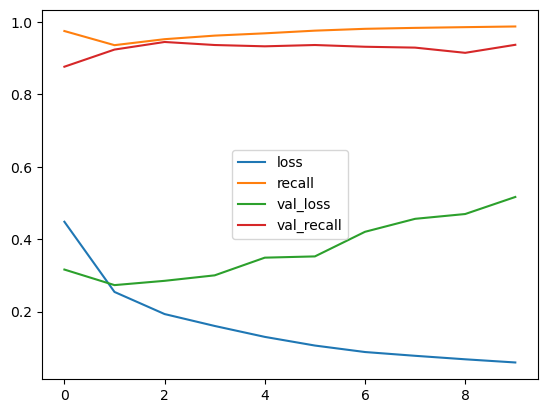

In [373]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot();

In [375]:
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.448086,0.975082,0.316013,0.876499
1,0.254145,0.936038,0.273020,0.923861
2,0.193029,0.952562,0.284866,0.944844
3,0.160132,0.962423,0.300015,0.936451
4,0.129966,0.968752,0.348879,0.932854


In [376]:
y_pred = model.predict(X_test, verbose=0) > 0.5
print(classification_report(y_test, y_pred,zero_division=False))

              precision    recall  f1-score   support

           0       0.73      0.65      0.69       410
           1       0.92      0.95      0.93      1854

    accuracy                           0.89      2264
   macro avg       0.83      0.80      0.81      2264
weighted avg       0.89      0.89      0.89      2264



## BERT Modeling

### Train test split

In [377]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,
stratify = y, random_state = 350)

In [378]:
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size = 0.1,
stratify = y_train, random_state = 350)

### Tokenization

In [380]:
from transformers import BertTokenizer
bert_token = BertTokenizer.from_pretrained('bert-base-uncased')

### Fixing token counts of all documents

In [387]:
def transformation(X):
  # set array dimensions
  seq_len = 70

  all_sentence_tokens = tokenizer(list(X),
                                  max_length=seq_len,
                                  truncation=True,
                                  padding='max_length',
                                  add_special_tokens=True)

  return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])


### Transformation Vectors to Matrices

In [392]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased") # using BERT tokenizer

num_of_sent_tokens = []
for sent in X:

    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

Max sentence length:  76


In [394]:
def transformation(X):
  ''' This function recives a set and tokenize it along with attention mask'''
  max_length = 162
  all_sentence_tokens = tokenizer(list(X),
                                  max_length=max_length,
                                  truncation=True,
                                  padding='max_length',
                                  add_special_tokens=True)

  return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

In [395]:
# tokenizing X_train, X_val, X_test
Xids_train, Xmask_train = transformation(X_train)
Xids_val, Xmask_val = transformation(X_val)
Xids_test, Xmask_test = transformation(X_test)

In [402]:
print('Xids train shape', Xids_train.shape)
print('Xids test shape', Xids_test.shape)
print('Xids val shape', Xids_val.shape)

Xids train shape (18330, 162)
Xids test shape (2264, 162)
Xids val shape (2037, 162)


### Transformation Matrix to Tensorflow tensor

In [404]:
# for assigning no. of batches
train_tens = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, y_train))
val_tens = tf.data.Dataset.from_tensor_slices((Xids_val, Xmask_val, y_val))
test_tens = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, y_test))

In [405]:
def mapping(ids, mask, classes):
    # into dict format
    return {'input_ids': ids, 'attention_mask': mask}, classes

# mappeing back to the ids and attention masks
train_tens = train_tens.map(mapping)
val_tens = val_tens.map(mapping)
test_tens = test_tens.map(mapping)

### Batch Size

In [407]:
train = train_tens.batch(32)
val = val_tens.batch(32)
test = test_tens.batch(32)

In [408]:
epochs = 3
steps_per_epoch = len(train_tens)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5
optimizer= optimization.create_optimizer(init_lr=init_lr
                                 num_train_steps=num_train_steps,
                                num_warmup_steps=num_warmup_steps,
                                  optimizer_type='adamw')

SyntaxError: invalid syntax (3450716127.py, line 9)

In [410]:
pip install -q tf-models-official

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
ERROR: Could not install packages due to an OSError: HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Max retries exceeded with url: /packages/39/84/fa71440981a298a9a9fa02319e9b43bbe98dafe4e0a91846d679814cd6d4/tf_models_official-2.15.0-py2.py3-none-any.whl.metadata (Caused by NewConnectionError('<pip._vendor.urllib3.connection.HTTPSConnection object at 0x104eddf10>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))



In [412]:
pip install tf-models-official

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
ERROR: Could not install packages due to an OSError: HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Max retries exceeded with url: /packages/39/84/fa71440981a298a9a9fa02319e9b43bbe98dafe4e0a91846d679814cd6d4/tf_models_official-2.15.0-py2.py3-none-any.whl.metadata (Caused by NewConnectionError('<pip._vendor.urllib3.connection.HTTPSConnection object at 0x7fe1fa0a5220>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

Note: you may need to restart the kernel to use updated packages.


In [415]:
pip install "tf-models-official==2.10.0"

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 4.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 2.0 MB/s eta 0:00:00
  Using cached kaggle-1.5.16.tar.gz (83 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 MB 2.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.3/259.3 kB 6.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.0 MB/s eta 0:00:0000:0100:0

### Creating optimization

In [416]:
from official.nlp import optimization

epochs = 5 # no more than 10 so it won't take a long time

steps_per_epoch = len(train)

train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1 * train_steps)

init_lr = 2e-5 # learning rate

optimizer= optimization.create_optimizer(init_lr = init_lr,
                                          num_train_steps = train_steps,
                                          num_warmup_steps = num_warmup_steps,
                                          optimizer_type = 'adamw') # optimizer 'adamw' with reg.

In [417]:
print(len(train)*5)
print(int(0.1*len(train)*5))

2865
286


### Creating Model with TPU

In [448]:
#f1-score needs to be manually calculated to use
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [449]:
def create_model():
    from transformers import TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFBertModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(70,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(70,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(256, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x)
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [450]:
tf.keras.backend.clear_session()


In [451]:
import tensorflow as tf

# Define the strategy
strategy = tf.distribute.MirroredStrategy()

# Now you can use the strategy
with strategy.scope():
    # Your code here
    loss = tf.keras.losses.BinaryCrossentropy()
    recall = tf.keras.metrics.Recall()


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


In [452]:
#create_model() returns a Keras model
modeltbu = create_model()
# Compile the model with the specified loss, optimizer, and metrics
modeltbu.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.03), metrics=['Recall'])


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [453]:
modeltbu.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 70)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 70)]         0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 70,                                            

### Model Fiting

In [454]:
from sklearn.utils.class_weight import compute_class_weight
C_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: C_weights[0], 1: C_weights[1]}

In [455]:
class_weights

{0: 2.7597109304426377, 1: 0.6106336198281032}

In [456]:
modeltbu.fit(train_tens, validation_data= val_tens, epochs=15, class_weight=class_weights)

Epoch 1/15


ValueError: in user code:

    File "/Users/marammahal/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/Users/marammahal/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/marammahal/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/Users/marammahal/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "/Users/marammahal/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/var/folders/1g/n2mycrbs19x_yplp92cmn_1w0000gn/T/__autograph_generated_file80kxf0u9.py", line 37, in tf__run_call_with_unpacked_inputs
        retval_ = ag__.converted_call(ag__.ld(func), (ag__.ld(self),), dict(**ag__.ld(unpacked_inputs)), fscope)
    File "/var/folders/1g/n2mycrbs19x_yplp92cmn_1w0000gn/T/__autograph_generated_file8tzit5gp.py", line 76, in tf__call
        (batch_size, seq_length) = ag__.ld(input_shape)

    ValueError: Exception encountered when calling layer "bert" "                 f"(type TFBertMainLayer).
    
    in user code:
    
        File "/Users/marammahal/miniconda3/envs/tensorflow/lib/python3.9/site-packages/transformers/modeling_tf_utils.py", line 753, in run_call_with_unpacked_inputs  *
            return func(self, **unpacked_inputs)
        File "/Users/marammahal/miniconda3/envs/tensorflow/lib/python3.9/site-packages/transformers/models/bert/modeling_tf_bert.py", line 766, in call  *
            batch_size, seq_length = input_shape
    
        ValueError: not enough values to unpack (expected 2, got 1)
    
    
    Call arguments received by layer "bert" "                 f"(type TFBertMainLayer):
      • self=tf.Tensor(shape=(162,), dtype=int32)
      • input_ids=None
      • attention_mask=tf.Tensor(shape=(162,), dtype=int32)
      • token_type_ids=None
      • position_ids=None
      • head_mask=None
      • inputs_embeds=None
      • encoder_hidden_states=None
      • encoder_attention_mask=None
      • past_key_values=None
      • use_cache=None
      • output_attentions=None
      • output_hidden_states=None
      • return_dict=None
      • training=True


### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___